# House Price Kaggle #

During my work on this project I found inspiration in following kernels found on Kaggle:

https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard

https://www.kaggle.com/poonaml/house-prices-data-exploration-and-visualisation

https://www.kaggle.com/dfitzgerald3/randomforestregressor

https://www.kaggle.com/meikegw/filling-up-missing-values


Keras, ...
https://www.kaggle.com/apapiu/regularized-linear-models

# The data #

Data are in two files in CVS format. 
- train.csv consist of  labeled data points with 80 features. 
- test.csv consist of unlabeled data points

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit

import usefull_methods as um
import do_actions as do

# Pretty display for notebooks
%matplotlib inline

data_train = pd.DataFrame()
data_test = pd.DataFrame()

data_train, data_test = um.load_data()
    
# Success
print "Kaggle 'House prices'  TRAIN dataset has {} data points with {} variables each.".format(*data_train.shape)
print "Kaggle 'House prices'  TEST dataset has {} data points with {} variables each.".format(*data_test.shape)

Kaggle 'House prices'  TRAIN dataset has 1460 data points with 81 variables each.
Kaggle 'House prices'  TEST dataset has 1459 data points with 80 variables each.


In [2]:
data_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
data_train.columns

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

from stopwatch import Stopwatch

stopwatch = Stopwatch()

In [5]:
from stopwatch import Stopwatch

stopwatch = Stopwatch()

In [6]:
## run all above

## Analysis of  sale price  'SalePrice' ##

In [7]:
stopwatch.start()

prices = data_train['SalePrice']
minimum_price = min(prices)
maximum_price = max(prices)
mean_price = np.mean(prices)
median_price = np.median(prices)

std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Kaggle House Price dataset:\n"
print "               Maximum price: ${:,.2f}".format(maximum_price)
print "               Minimum price: ${:,.2f}\n".format(minimum_price)
print "               Mean price:    ${:,.2f}".format(mean_price)
print "               Median price   ${:,.2f}\n".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

stopwatch.print_elapsed_time()

Statistics for Kaggle House Price dataset:

               Maximum price: $755,000.00
               Minimum price: $34,900.00

               Mean price:    $180,921.20
               Median price   $163,000.00

Standard deviation of prices: $79,415.29

Elapsed time: 00:00:00



In [8]:
prices.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

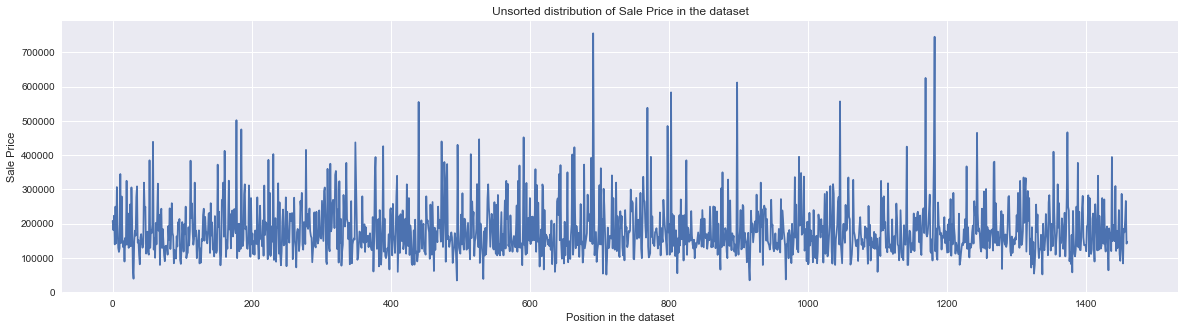

In [9]:
# PLOT distribution of 'SalePrice' in the dataset

plt.figure(figsize=[20,5])
plt.plot(prices)
plt.title("Unsorted distribution of Sale Price in the dataset")
plt.ylabel("Sale Price")
plt.xlabel("Position in the dataset");
plt.show()

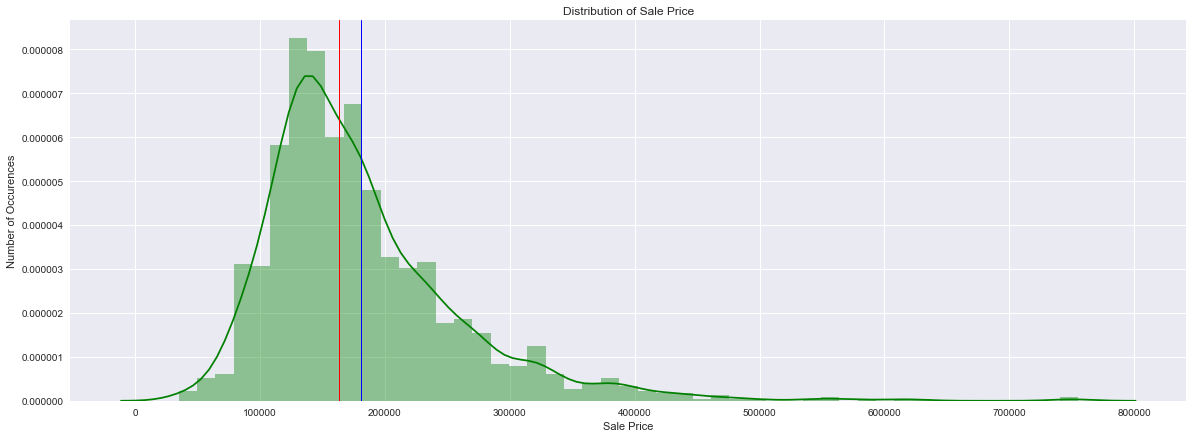

In [10]:
import seaborn as sns

# set size of the graph
plt.subplots(figsize=(20, 7))

ax = sns.distplot(prices, color="g", kde=True )
ax.axvline(prices.mean(),linewidth=1, color='b')
ax.axvline(prices.median(),linewidth=1, color='r')

plt.title("Distribution of Sale Price")
plt.ylabel("Number of Occurences")
plt.xlabel("Sale Price");
plt.show()


### Skewness  and Kurtosis ###

**Skewness** is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.

**Kurtosis** is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers. A uniform distribution would be the extreme case.

Source: http://www.itl.nist.gov/div898/handbook/eda/section3/eda35b.htm

           Skewness: 1.8829   Kurtosis: 6.5363
Log scale  Skewness: 0.1213   Kurtosis: 0.8095


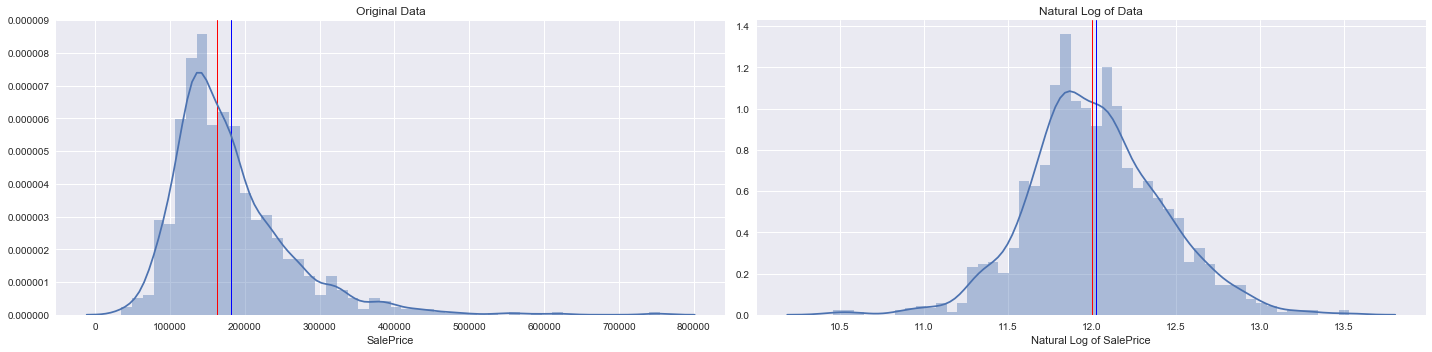

In [11]:
import usefull_methods as um
um.plot_distro(data_train,'SalePrice')

           Skewness: 12.2077   Kurtosis: 203.2433
Log scale  Skewness: -0.1380   Kurtosis: 4.7134


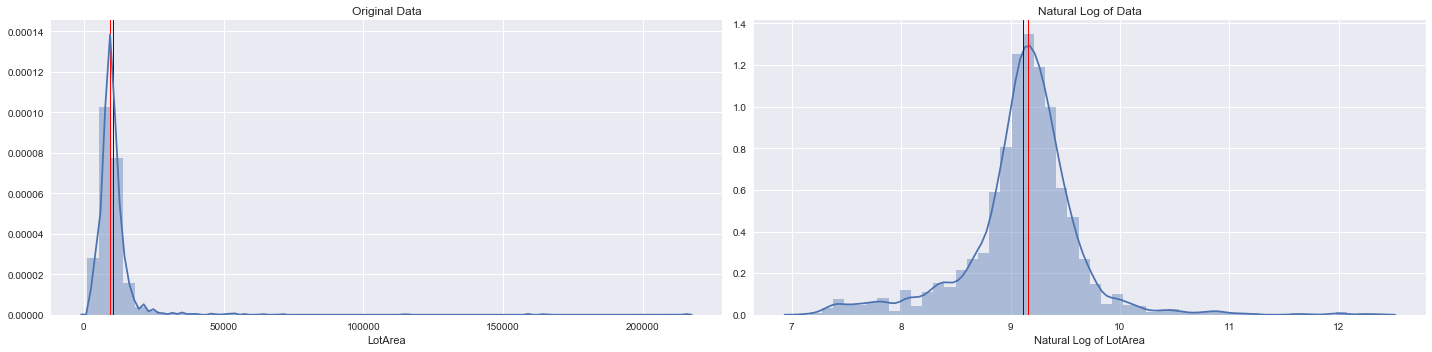

In [12]:
import usefull_methods as um
um.plot_distro(data_train,'LotArea')


           Skewness: 1.3666   Kurtosis: 4.8951
Log scale  Skewness: -0.0070   Kurtosis: 0.2826


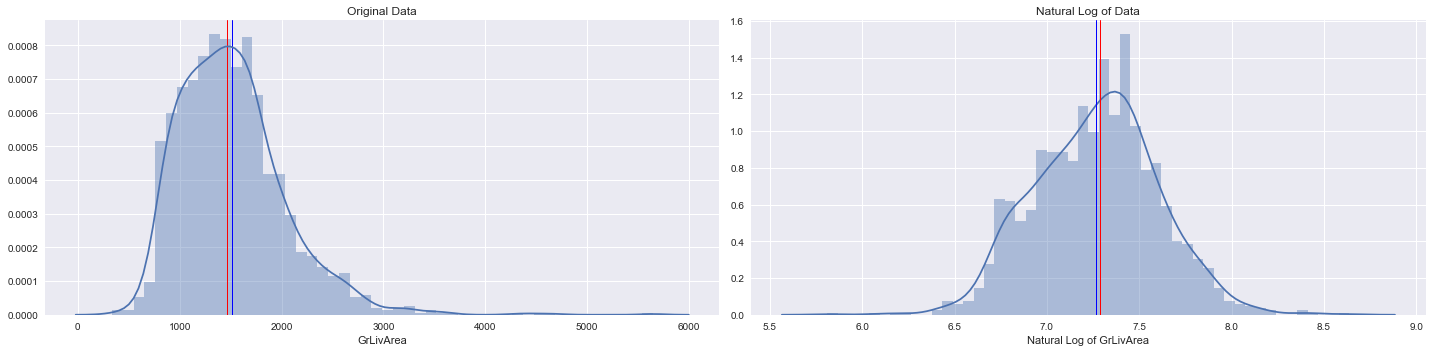

In [13]:
import usefull_methods as um
um.plot_distro(data_train,'GrLivArea')

## Total Square Footage ##

LotArea Lot size in square feet
MasVnrArea Masonry veneer area in square feet

BsmtFinSF1  Type 1 finished square feet
TotalBsmtSF Total square feet of basement area
1stFlrSF
BsmtFinSF
BsmtUnfSF
2ndFlrSF
LowQualFinSF
WoodDeckSF
OpenPorchSF

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish', u'GarageCars', u'GarageArea', u'GarageQual',
       u'GarageCond', u'PavedDrive', u'WoodDeckSF', u'OpenPorchSF',
       u'EnclosedPorch', u'3SsnPorch', u'ScreenPorch', u'PoolArea', u'PoolQC',
       u'Fence', u'MiscFeature', u'MiscVal', u'MoSold', u'YrSold', u'SaleType',
       u'SaleCondition', u'SalePrice'],


In [14]:
# add Total surface area for column
data_train = do.add_TotalSF(data_train)

           Skewness: 1.7767   Kurtosis: 12.6220
Log scale  Skewness: -0.3496   Kurtosis: 1.9904


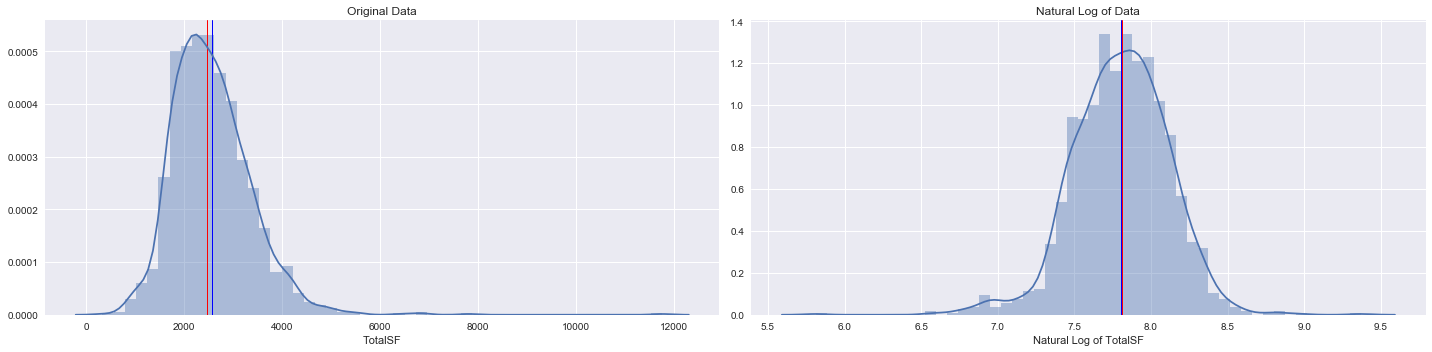

In [15]:
import usefull_methods as um
um.plot_distro(data_train,'TotalSF')

## Linear Regresion on square footage and price ##

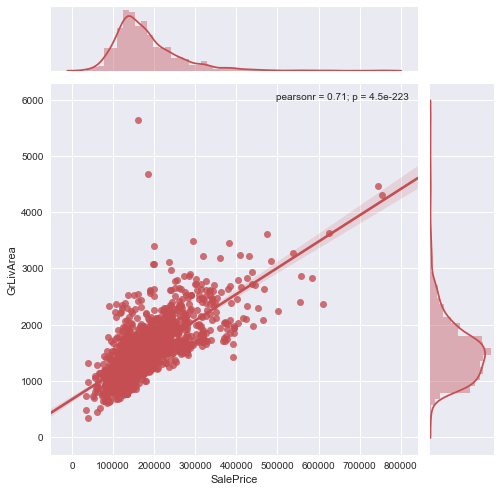

In [16]:
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

g = sns.jointplot('SalePrice', 'GrLivArea', data=data_train, kind="reg", color="r", size=7)

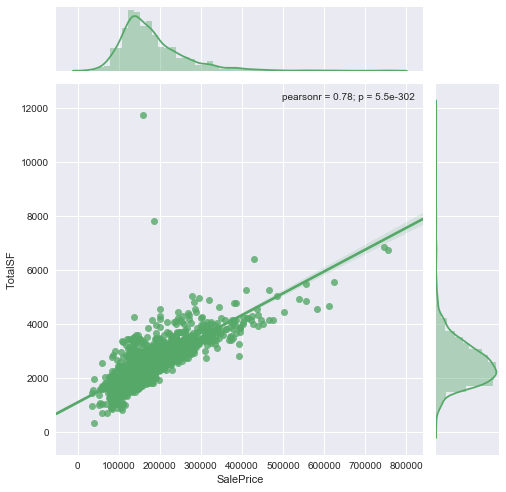

In [17]:
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

g = sns.jointplot('SalePrice', 'TotalSF', data=data_train, kind="reg", color="g", size=7)

# Outliers #

In [18]:
data_train, data_test = um.load_data()

data_train[data_train['GrLivArea']>4500]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [19]:
import do_actions as do
import usefull_methods as um

data_train, data_test = um.load_data()
data_train = do.remove_this_Ids(data_train, [524, 1299])
data_train[data_train['GrLivArea']>4500]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


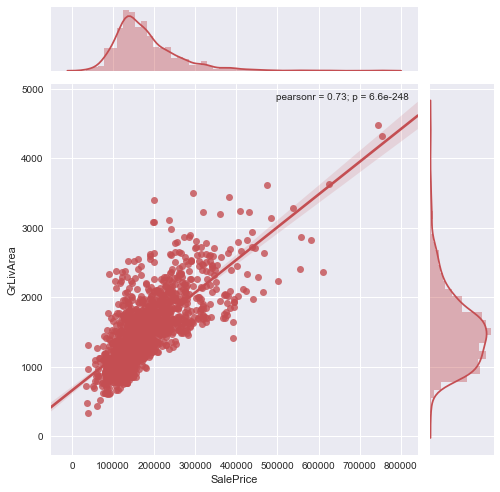

In [20]:
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)
data_train, data_test = um.load_data()
# add Total surface area for column
data_train = do.add_TotalSF(data_train)
data_train = do.remove_this_Ids(data_train, [524, 1299])
g = sns.jointplot('SalePrice', 'GrLivArea', data=data_train, kind="reg", color="r", size=7)

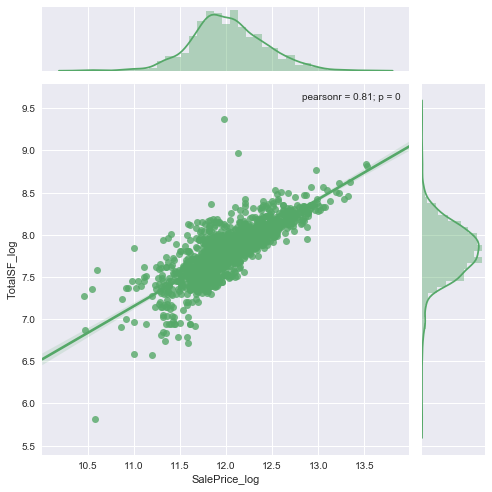

In [21]:
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

import do_actions as do
data_train, data_test = um.load_data()

data_train = do.add_TotalSF_log(data_train)
data_train['SalePrice_log'] = data_train['SalePrice'].apply(np.log)

g = sns.jointplot('SalePrice_log', 'TotalSF_log', data=data_train, kind="reg", color="g", size=7)

In [98]:
all_data = pd.concat([data_train, data_test])
all_data.get_dtype_counts()

float64    11
int64      26
object     43
dtype: int64

# Metrics #


https://www.kaggle.com/wiki/RootMeanSquaredError


In [22]:
import sklearn
import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def RMSE(y, y_pred):
    return np.sqrt(np.sum(np.square(y_pred-y))/len(y))

def RMSElog(y, y_pred):
    y = np.log(y)
    y_pred = np.log(y_pred)
    return np.sqrt(np.sum(np.square(y_pred-y))/len(y))


## First prediction - Linear Regression: 'SalePrice' vs. 'GrLivArea' ##

In [23]:
from sklearn.linear_model import LinearRegression

def do_LinearRegression(first_col, second_col):
    prices = data_train[first_col]
    features = data_train[second_col].values.reshape(-1,1)
    model = LinearRegression()
    model.fit(features, prices)
    predicted = model.predict(features)
    return prices, predicted

def calc_metrics(y, y_pred):
    r2score = r2_score(y, y_pred)
    rmse_log = RMSElog(y, y_pred)
    rmse = RMSE(y, y_pred)
    return rmse, rmse_log,  r2score

def print_metrics (rmse, rmse_log,r2score):
    print('RMSE               : {:.4f}'.format(rmse, prec=5))
    print('RMSE of logarithms : {:.4f}'.format(rmse_log, prec=5))
    print('R2 score           : {:.6f}'.format(r2score, prec = 5))
    
def show_metrics(y, y_pred):
    rmse, rmse_log, r2score = calc_metrics(y, y_pred)
    print_metrics(rmse, rmse_log, r2score )
       

In [24]:
data_train, data_test = um.load_data() 
data_train = do.add_TotalSF(data_train)

y, y_pred = do_LinearRegression('SalePrice', 'GrLivArea')
show_metrics( y, y_pred )

RMSE               : 56034.3039
RMSE of logarithms : 0.2756
R2 score           : 0.502149


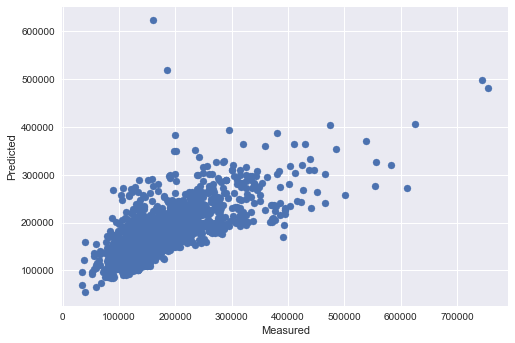

In [25]:

fig, ax = plt.subplots()
ax.scatter(y, y_pred)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## Second prediction - Linear Regression: 'SalePrice' vs. 'TotalSF' ##

In [26]:
data_train, data_test = um.load_data() 
data_train = do.add_TotalSF(data_train)

y, y_pred = do_LinearRegression('SalePrice', 'TotalSF')
show_metrics(y, y_pred)

RMSE               : 49471.9159
RMSE of logarithms : 0.2406
R2 score           : 0.611931


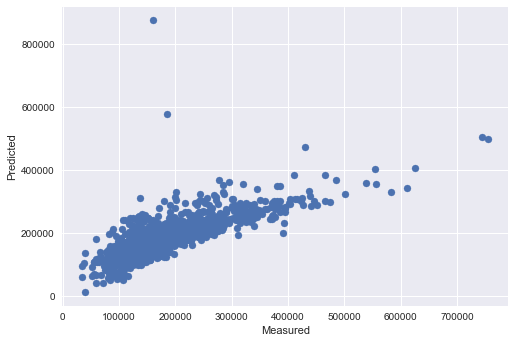

In [27]:
fig, ax = plt.subplots()
ax.scatter(y, y_pred)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## Second prediction - Linear Regression: 'SalePrice' vs. unskewed 'TotalSF' ##

In [28]:
import usefull_methods as um
import do_actions as do

data_train, data_test = um.load_data() 

data_train = do.add_TotalSF(data_train)
data_train = do.unskew(data_train,'TotalSF')
data_train = do.unskew(data_train, 'SalePrice')

y, y_pred = do_LinearRegression('SalePrice', 'TotalSF')
show_metrics(y, y_pred)

RMSE               : 0.2357
RMSE of logarithms : 0.0197
R2 score           : 0.651475


In [29]:
# consistency check

data_train, data_test = um.load_data()
data_train = do.add_TotalSF(data_train)
y, y_pred = do_LinearRegression('SalePrice', 'TotalSF')
show_metrics(y, y_pred)

RMSE               : 49471.9159
RMSE of logarithms : 0.2406
R2 score           : 0.611931


## Correlation ##

In [105]:
corr=data_train.corr()["SalePrice"]
ccof = corr[np.argsort(corr, axis=0)[::-1]]

ccof = ccof.drop(['SalePrice','Id'])
ccof

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [111]:
list(ccof.index)

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'GarageYrBlt',
 'MasVnrArea',
 'Fireplaces',
 'BsmtFinSF1',
 'LotFrontage',
 'WoodDeckSF',
 '2ndFlrSF',
 'OpenPorchSF',
 'HalfBath',
 'LotArea',
 'BsmtFullBath',
 'BsmtUnfSF',
 'BedroomAbvGr',
 'ScreenPorch',
 'PoolArea',
 'MoSold',
 '3SsnPorch',
 'BsmtFinSF2',
 'BsmtHalfBath',
 'MiscVal',
 'LowQualFinSF',
 'YrSold',
 'OverallCond',
 'MSSubClass',
 'EnclosedPorch',
 'KitchenAbvGr']

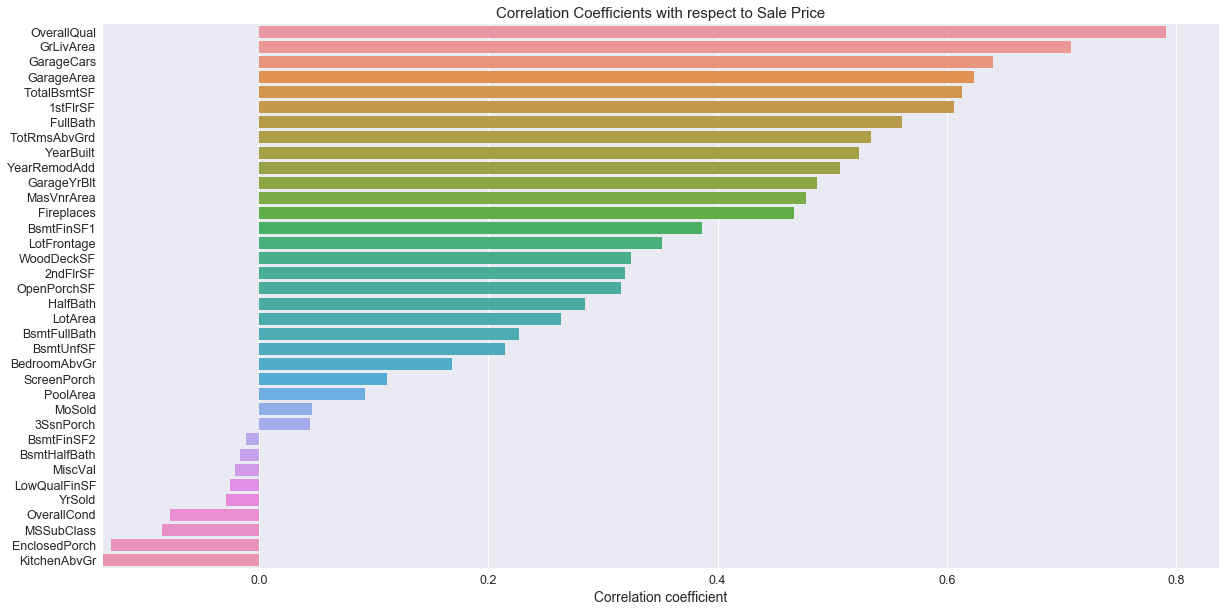

In [106]:


fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(y = ccof.index, x =ccof.values )
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation Coefficients with respect to Sale Price")

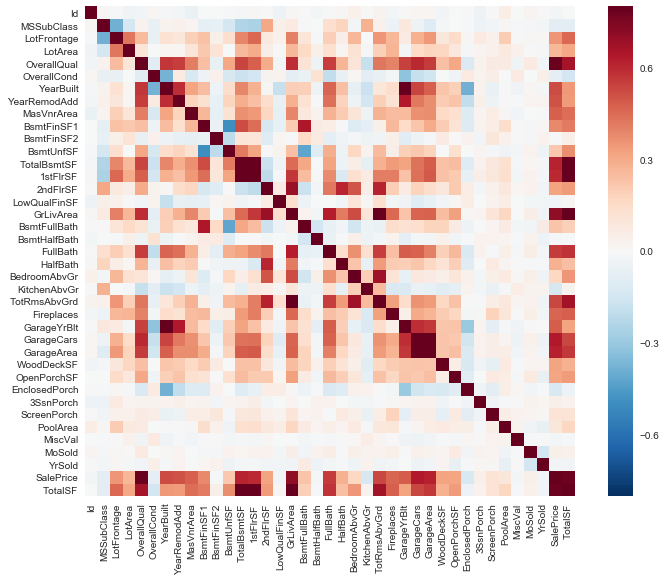

In [32]:
#correlation matrix
corrmat = data_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

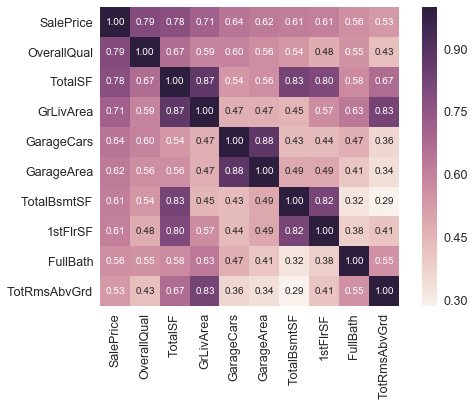

In [33]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap

cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Missing data ##

In [34]:
def show_missing(data):
    missing = data.columns[data.isnull().any()].tolist()
    return missing

# Looking at categorical values
def cat_exploration(data, column):
    return data[column].value_counts()

# deleting missing data
def handle_missing(data, column, value):
    data.loc[data[column].isnull(),column] = value
    return data

def count_missing(data):
    data[show_missing(data)].isnull().sum()

In [35]:
data_train, data_test = um.load_data()
all_data = pd.concat((data_train, data_test))

show_missing(all_data)

['Alley',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual',
 'BsmtUnfSF',
 'Electrical',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Functional',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageYrBlt',
 'KitchenQual',
 'LotFrontage',
 'MSZoning',
 'MasVnrArea',
 'MasVnrType',
 'MiscFeature',
 'PoolQC',
 'SalePrice',
 'SaleType',
 'TotalBsmtSF',
 'Utilities']

In [36]:
total = all_data.isnull().sum()
percent = (all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([corr, total, percent], axis=1, keys=['Corr', 'Total', 'Percent'])

missing_data = missing_data.sort_values('Total', ascending = False)
missing_data.head(20)

,Corr,Total,Percent
PoolQC,NaN,2909.0,0.996574
MiscFeature,NaN,2814.0,0.964029
Alley,NaN,2721.0,0.932169
Fence,NaN,2348.0,0.804385
SalePrice,1.000000,1459.0,0.499829
FireplaceQu,NaN,1420.0,0.486468
LotFrontage,0.351799,486.0,0.166495
GarageQual,NaN,159.0,0.054471
GarageFinish,NaN,159.0,0.054471
GarageCond,NaN,159.0,0.054471


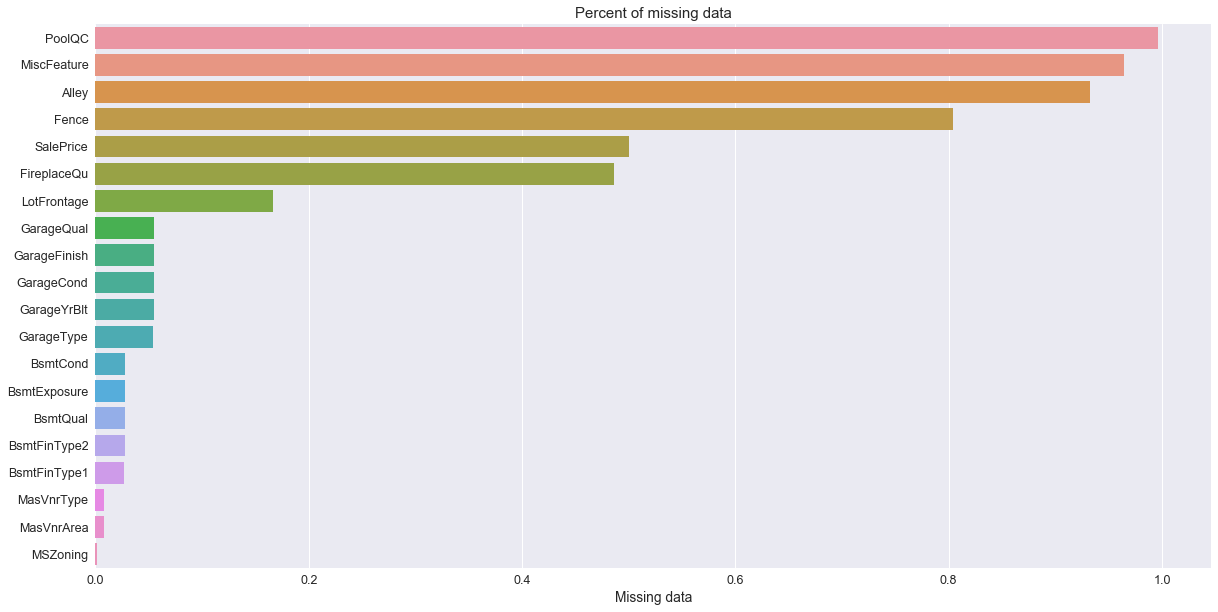

In [37]:
k = 20
fig, ax = plt.subplots(figsize=(20,10))

missing_data_top20 = missing_data[:20]
ax = sns.barplot(y = missing_data_top20.index, x = missing_data_top20['Percent'])
ax.set_xlabel("Missing data")
ax.set_title("Percent of missing data")

In [38]:
count_missing(all_data)

##  Pool ##

In [39]:
all_data['PoolArea'].describe()

count    2919.000000
mean        2.251799
std        35.663946
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       800.000000
Name: PoolArea, dtype: float64

In [40]:
# count sum of PoolAreas  where PoolQC == NaN

pool_areas = data_train['PoolArea'][data_train['PoolQC'].isnull()==True].sum()
print(pool_areas)

0


In [41]:
all_data = handle_missing(all_data, 'PoolQC', 'None')

## MiscFeature ##

MiscFeature: Miscellaneous feature not covered in other categories

  - Elev - Elevator
  - Gar2 - 2nd Garage (if not described in garage section)
  - Othr - Other
  - Shed - Shed (over 100 SF)
  - TenC - Tennis Court
  - NA   - None
  
  Replace NaN with 'None' 

In [42]:
all_data = handle_missing(all_data, 'MiscFeature', 'None' )

## Alley ##

Alley: Type of alley access to property

- Grvl - Gravel
- Pave - Paved
- NA   - No alley access
   
Replace NaN with 'None'  

In [43]:
all_data = handle_missing(all_data, 'Alley', 'None' )

## Fence ##

Fence: Fence quality

- GdPrv   - Good Privacy
- MnPrv   - Minimum Privacy
- GdWo    - Good Wood
- MnWw    - Minimum Wood/Wire
- NA      - No Fence

NA means no Fence at all simply replace NaN with 'None'

In [44]:
all_data = handle_missing(all_data, 'Fence', 'None' )

## FireplaceQu ##

FireplaceQu: Fireplace quality

- Ex    Excellent - Exceptional Masonry Fireplace
- Gd    Good - Masonry Fireplace in main level
- TA    Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
- Fa    Fair - Prefabricated Fireplace in basement
- Po    Poor - Ben Franklin Stove
- NA    No Fireplacehandle_missing(data_train, 'Fence', 'None' )

NA means no fireplace at all simply replace NaN with 'None'

In [45]:
# just check it if true
fp_areas = all_data['Fireplaces'][all_data['FireplaceQu'].isnull()==True].sum()
print(fp_areas)

0


In [46]:
all_data = handle_missing(all_data, 'FireplaceQu', 'None' )

## LotFrontage ##

- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet

I assume that the missing data in LotFrontage can mean two things:
eiter the property hasn't really direct access to the street. This is not common, but in some circumstances possible. Or property definitely has direct access to the street and data are simply missing.

For the first case, the proper value is simply zero, for the second case the value must be calculated or estimaded.



In [47]:
all_data = handle_missing(all_data, 'LotFrontage', 0.0 )

## Garage ##

'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',

GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage


GarageCars: Size of garage in car capacity		

GarageArea: Size of garage in square feet


In [48]:
all_data = handle_missing(all_data, 'GarageType', 'None' )
all_data = handle_missing(all_data, 'GarageYrBlt', 0.0 )
all_data = handle_missing(all_data, 'GarageFinish', 'None' )
all_data = handle_missing(all_data, 'GarageQual', 'None' )
all_data = handle_missing(all_data, 'GarageCond', 'None' )

## Basement ###

Missing data

'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		


BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

BsmtFinSF1: Type 1 finished square feet

In [49]:
all_data = handle_missing(all_data, 'BsmtQual', 'None' )
all_data = handle_missing(all_data, 'BsmtCond', 'None' )
all_data = handle_missing(all_data, 'BsmtExposure', 'None' )
all_data = handle_missing(all_data, 'BsmtFinType1', 'None' )
all_data = handle_missing(all_data, 'BsmtFinType2', 'None' )

## Mansonry ##

MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	    None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet


In [50]:
all_data = handle_missing(all_data, 'MasVnrType', 'None' )
all_data = handle_missing(all_data, 'MasVnrArea', 0.0 )

## Electrical ##

Only one value is missing.

Use most common value.

In [51]:
all_data['Electrical'].value_counts()


SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [52]:
all_data = handle_missing(all_data, 'Electrical','SBrkr' )

## MSZoning ##

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

In [53]:
print (cat_exploration(all_data, 'MSZoning'))

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64


In [54]:
all_data = handle_missing(all_data, 'MSZoning','RL' )

## Utilities ##

In [55]:
all_data = all_data.drop(['Utilities'], axis=1)

## Functional ##

Assume typical unless deductions are warranted

In [56]:
all_data = handle_missing(all_data, 'Functional','Typ' )

## Exterior1st,  Exterior2nd ##

In [57]:
print (cat_exploration(all_data, 'Exterior1st'))
print (cat_exploration(all_data, 'Exterior2nd'))

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64


In [58]:
all_data = handle_missing(all_data, 'Exterior1st','VinylSd' )
all_data = handle_missing(all_data, 'Exterior2nd','VinylSd' )

In [59]:
show_missing(all_data)

['BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'GarageArea',
 'GarageCars',
 'KitchenQual',
 'SalePrice',
 'SaleType',
 'TotalBsmtSF']

In [60]:
def do_handle_missing_data(data):
    data = handle_missing(data, 'PoolQC', 'None')
    data = handle_missing(data, 'MiscFeature', 'None' )
    data = handle_missing(data, 'Alley', 'None' )
    data = handle_missing(data, 'Fence', 'None' )
    data = handle_missing(data, 'FireplaceQu', 'None' )
    data = handle_missing(data, 'LotFrontage', 0.0 )
    
    data = handle_missing(data, 'GarageType', 'None' )
    data = handle_missing(data, 'GarageYrBlt', 0.0 )
    data = handle_missing(data, 'GarageFinish', 'None' )
    data = handle_missing(data, 'GarageQual', 'None' )
    data = handle_missing(data, 'GarageCond', 'None' )
    data = handle_missing(data, 'GarageArea', 0.0 )
    data = handle_missing(data, 'GarageCars', 'None' )
 
    data = handle_missing(data, 'BsmtQual', 'None' )
    data = handle_missing(data, 'BsmtCond', 'None' )
    data = handle_missing(data, 'BsmtExposure', 'None' )
    data = handle_missing(data, 'BsmtFinType1', 'None' )
    data = handle_missing(data, 'BsmtFinType2', 'None' )
    
    data = handle_missing(data, 'BsmtFinSF1', 0.0)
    data = handle_missing(data, 'BsmtFinSF2', 0.0 )
    data = handle_missing(data, 'BsmtFullBath', 'None' )
    data = handle_missing(data, 'BsmtHalfBath', 'None' )
    data = handle_missing(data, 'BsmtUnfSF', 0.0 )
    
    data = handle_missing(data, 'TotalBsmtSF', 0.0 )
    
    data = handle_missing(data, 'MasVnrType', 'None' )
    data = handle_missing(data, 'MasVnrArea', 0.0 )
    data = handle_missing(data, 'Electrical','SBrkr' )
    
    data = handle_missing(data, 'Functional','Typ' )
    
    data = handle_missing(data, 'KitchenQual','TA' )
    data = handle_missing(data, 'MSZoning','RL' )
    data = handle_missing(data, 'Exterior1st','VinylSd' )
    data = handle_missing(data, 'Exterior2nd','VinylSd' )
    
    data = handle_missing(data, 'SaleType','WD' )
    
    # not in training set
    data = data.drop(['Utilities'], axis=1)
    
    return data

In [61]:
# test
data_train, data_test = um.load_data()
all_data = pd.concat((data_train, data_test))

print (len(show_missing(all_data)))
data_train = do_handle_missing_data(all_data)
print (len(show_missing(all_data)))

35
2


## Outliers ##

In [62]:
def do_remove_outliers_simple(data):
    data = data.drop(data[(data_train['GrLivArea']>4000) & (data['SalePrice']<300000)].index)
    return data

# Data preaparation #

In [63]:
def do_data_prepare(data):
    # copy data
    model_data = data.copy()    
    model_data = pd.get_dummies(model_data)
    # keep columns if datytype is number
    keep_cols = model_data.select_dtypes(include = ['number']).columns
    model_data = model_data[keep_cols]
    return model_data

def do_target_features(data):
    target = data['SalePrice']
    features = data.drop(['SalePrice', 'Id'], axis = 1)
    return target, features

model_data = do_data_prepare(data_train)
model_data = do_remove_outliers_simple(model_data)
target, features = do_target_features(model_data)

print (target.shape)
print (features.shape)

(2915L,)
(2915, 313)


In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score

class GridSearchObject:
    def __init__(self, estimator, grid_params):
        self.estimator = estimator
        self.name = type(estimator).__name__
        self.grid_params = grid_params


class GridSearchBatch:
    def __init__(self, features,target):
        self.features = features
        self.target = target
        self.results_list = []
        self.batch_list = []
        self.stopwatch = Stopwatch()

    def add(self, grid_search_object):
        self.batch_list.append(grid_search_object)
        
    def run(self):
        scorer = make_scorer(r2_score)
        for gso in self.batch_list:
            self.stopwatch.start()
            grid_search = GridSearchCV(gso.estimator, gso.grid_params, scoring = scorer, cv=5, n_jobs =-1)
            grid_search.fit(self.features, self.target)
            duration = self.stopwatch.elapsed_time()
            cv_results = grid_search.cv_results_
            cv_results.update({'duration':duration})
            cv_results.update({'name':gso.name})
            cv_results.update({'grid_params':gso.grid_params})
            self.results_list.append(cv_results)
            self.stopwatch.print_elapsed_time()
            print(gso.name)
            print(grid_search.best_estimator_)
            print(grid_search.best_score_ )
        return self.results_list
            


In [65]:
import usefull_methods as um
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

data_train, data_test = um.load_data()
data_train = do_handle_missing_data(data_train)

data_train = do_remove_outliers_simple(data_train)
data_train = do_data_prepare(data_train)

target, features  = do_target_features(data_train)
batch = GridSearchBatch(features, target)
print (show_missing(data_train))
print (target.shape)
print (features.shape)

[]
(1458L,)
(1458, 299)


In [69]:

# param_grid - dict or list of dictionaries
param_grid = {'max_depth': [ 20, 25, 30, 32  ], 'n_estimators':[ 300, 325, 350, 375, 400 ]}
#param_grid = {'max_depth': [ 15, 20, 25, 30, 32  ], 'n_estimators':[275, 300, 325, 350, 375, 400 ]}
#param_grid = {'max_depth': [ 30, 32, 36, ], 'n_estimators':[275, 300, 325, ]}
#cv_scores = cross_val_score(rf_test, features, target, cv = 5, n_jobs = -1)
estimator = RandomForestRegressor(max_features = 100, oob_score=True, random_state=458)
batch.add( GridSearchObject(estimator, param_grid))

param_grid = {'max_depth': [ 2, 5, 25, 30 ], 'n_estimators':[ 800, 900, 1000, 1100, 1200  ]}
estimator = GradientBoostingRegressor( max_features = 100,  random_state=1234)
batch.add( GridSearchObject(estimator, param_grid))


param_grid = {'max_depth': [ 2, 3, 4], 'n_estimators':[1000, 1200, 1300, 1400, 1500 ]}
estimator = XGBRegressor(colsample_bytree=0.2, learning_rate=0.05, random_state = 1337 )
batch.add( GridSearchObject(estimator, param_grid))

#results = batch.run()

In [70]:
def plot(batch, max_col = 3 ):
    N = len(batch.results_list)
    max_row = 1 + N/max_col
    fig, axes = plt.subplots(nrows=max_row, ncols=max_col, figsize=(15,15))
    axes = axes.flatten()
    idx = 0
    for regr in batch.results_list:
        ax = axes[idx]
        plot_ax(ax, regr)
        idx += 1
    plt.tight_layout()
            
def plot_ax(ax,  cv_results ):
    # Get Test Scores Mean and std for each grid search
    name = cv_results['name']
    grid_params = cv_results['grid_params']
    param_names = grid_params.keys()
    grid_param_1 = grid_params.get(param_names[0])
    grid_param_2 = grid_params.get(param_names[1])
    
    scores_mean = cv_results.get('mean_test_score')
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))
    scores_sd = cv_results.get('std_test_score')
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))
        
    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.set_title(name, fontweight='bold')
        ax.set_xlabel(param_names[0])
        ax.set_ylabel('CV Average Score')
        ax.legend(loc="best")
        ax.grid('on')
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= param_names[1] + ': ' + str(val))


AttributeError: 'AxesSubplot' object has no attribute 'flatten'

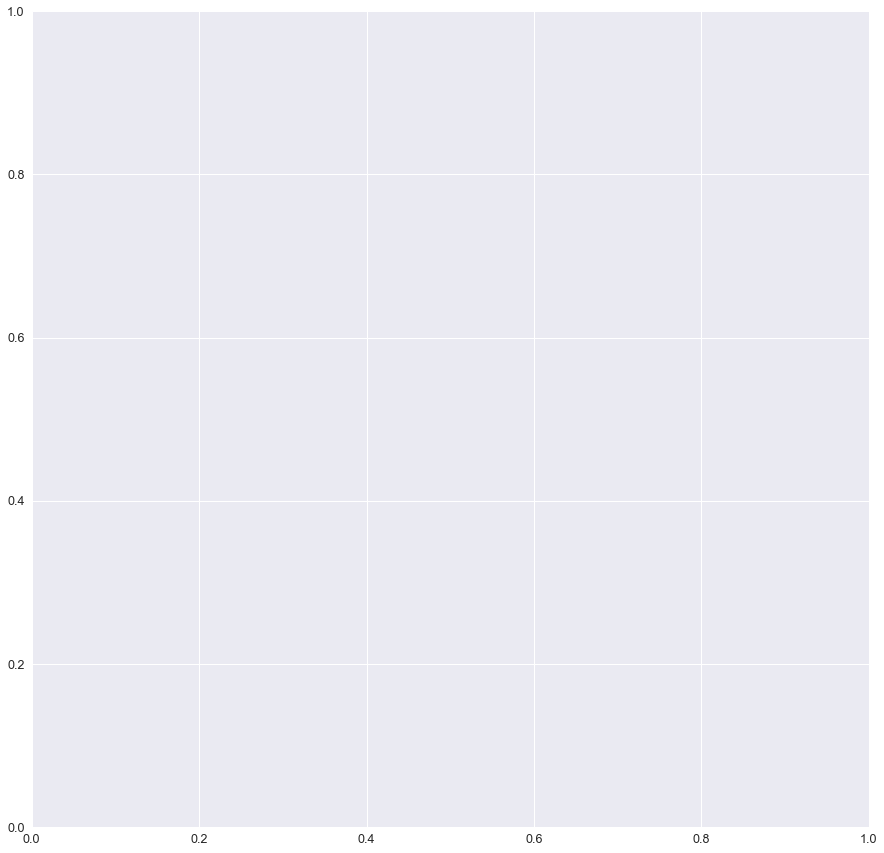

In [68]:
plot(batch, 1)

### Random Forrest Regressor ####

In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

stopwatch.start()
### Random Forrest Regressor ####
rf_test = RandomForestRegressor(max_depth=20, n_estimators=375, max_features = 100, oob_score=True, random_state=1234)
cv_scores = cross_val_score(rf_test, features, target, cv = 5, n_jobs = -1)

stopwatch.print_elapsed_time()

print('CV Score is: '+ str(np.mean(cv_scores)))
 


Elapsed time: 00:00:21

CV Score is: 0.896906402705


In [ ]:
CV Score is: 0.896906402705
CV Score is: 0.895790559573
CV Score is: 0.89672659448    

### Gradient Boosting Regressor ####


In [73]:
from sklearn.ensemble import GradientBoostingRegressor

stopwatch.start()
rf_test = Grf_test = GradientBoostingRegressor(max_depth=2, n_estimators=1000, max_features = 100,  learning_rate = 0.05, random_state=1234)
cv_scores = cross_val_score(rf_test, features, target, cv = 5, n_jobs = -1)
print('CV Score is: '+ str(np.mean(cv_scores)))

stopwatch.print_elapsed_time()

CV Score is: 0.924559770564

Elapsed time: 00:00:13



In [ ]:
CV Score is: 0.924559770564

CV Score is: 0.92384932187
CV Score is: 0.875173018439
CV Score is: 0.899928901083

In [ ]:
from sklearn.model_selection import train_test_split

def do_best_GBR(features, target):
    model = GradientBoostingRegressor(max_depth=2, n_estimators=1200, max_features = 100,  learning_rate = 0.05, random_state=1234)
    X_train, X_test, y_train, y_test = train_test_split( features, target, test_size=0.25, random_state=42)
    model.fit(X_train, y_train)
    predicted = rf_test.predict(X_test)
    r2 = r2_score(predicted, y_test)
    return 

def do_predict(model, X_test):
    predicted = model.predict(X_test)
    


In [ ]:
f_imp = rf_test.feature_importances_
#print(f_imp)
#print(f_imp.shape)
#print X_train.columns

df = pd.DataFrame()
df['feature'] = X_train.columns
df['importance'] = f_imp

print(df.sort_values('importance', ascending = False))

### XGBoost Regressor ###


installation of XGBoost: 
http://www.picnet.com.au/blogs/guido/post/2016/09/22/xgboost-windows-x64-binaries-for-download/?cm_mc_uid=98722125151115014280535&cm_mc_sid_50200000=1501577442
with some advice
https://stackoverflow.com/questions/43327020/xgboostlibrarynotfound-cannot-find-xgboost-library-in-the-candidate-path-did-y


Usage taken from *PhillipBall: Journey to the top 10%*

https://www.kaggle.com/fiorenza2/journey-to-the-top-10

In [ ]:
import xgboost as xgb

# cv_scores = cross_val_score(rf_test, features, target, cv = 5, n_jobs = -1)
# print('CV Score is: '+ str(np.mean(cv_scores)))

In [74]:
from xgboost import XGBRegressor

xgb = XGBRegressor(colsample_bytree=0.2,
                 learning_rate=0.05,
                 max_depth=2,
                 n_estimators=3000,
                 random_state = 1337
                )


In [75]:
from sklearn.model_selection import cross_val_score
stopwatch.start()
cv_scores = cross_val_score(xgb, features, target, cv = 5, n_jobs = -1)

stopwatch.print_elapsed_time()
print('CV Score is: '+ str(np.mean(cv_scores)))


Elapsed time: 00:00:23

CV Score is: 0.924062989629


In [ ]:
CV Score is: 0.924062989629
CV Score is: 0.925995929712
CV Score is: 0.925860338422

## Best Regressor ##

In [77]:
from xgboost import XGBRegressor
xgb = XGBRegressor(colsample_bytree=0.2, learning_rate=0.05, max_depth=2, n_estimators=1500, random_state = 133)

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=1000, max_features = 'sqrt',  learning_rate = 0.05, random_state=1234)

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=20, n_estimators=375, max_features = 'sqrt', oob_score=True, random_state=1234)

In [78]:
from sklearn.model_selection import train_test_split

def perform_regression(estimator, features, target):
    X_train, X_test, y_train, y_test = train_test_split( features, target, test_size=0.33, random_state=42)
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    return y_test, y_pred

def scores_for_regression(estimator, features, target):
    y, y_pred = perform_regression(estimator, features, target)
    show_metrics(y, y_pred)

In [79]:
stopwatch.start()
data_train, data_test = um.load_data()
model_data = do_handle_missing_data(data_train)

model_data = do_data_prepare(model_data)

model_data = do_remove_outliers_simple(model_data)
target, features = do_target_features(model_data)

print("XGBRegressor")
scores_for_regression(xgb, features, target)
print("GradientBoostingRegressor")
scores_for_regression(gbr, features, target)
print("RandomForestRegressor")
scores_for_regression(rfr, features, target)

stopwatch.print_elapsed_time()


XGBRegressor
RMSE               : 21478.2074
RMSE of logarithms : 0.1191
R2 score           : 0.923574
GradientBoostingRegressor
RMSE               : 21337.7119
RMSE of logarithms : 0.1243
R2 score           : 0.924571
RandomForestRegressor
RMSE               : 27721.8280
RMSE of logarithms : 0.1486
R2 score           : 0.872683

Elapsed time: 00:00:06



## Best regressor on unskewd SalePrice and Squara Footage ##

In [88]:
import do_actions as do

stopwatch.start()
data_train, data_test = um.load_data()
model_data = do_handle_missing_data(data_train)
model_data = do_remove_outliers_simple(model_data)
#model_data = do_unskew_columns(model_data, ['SalePrice', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF'])
model_data = do.unskew(model_data, 'SalePrice')
model_data = do.add_TotalSF_log(model_data)

#model_data.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis = 1)
#model_data.drop(['RoofMatl', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'LowQualFinSF',
#               'BsmtFullBath', 'BsmtHalfBath', 'Functional', 'GarageYrBlt', 'GarageArea', 'GarageCond', 'WoodDeckSF',
#               'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal'],
#              axis=1, inplace=True)

model_data = do_data_prepare(model_data)

target, features = do_target_features(model_data)

print("XGBRegressor")
scores_for_regression(xgb, features, target)
print("GradientBoostingRegressor")
scores_for_regression(gbr, features, target)
print("RandomForestRegressor")
scores_for_regression(rfr, features, target)

stopwatch.print_elapsed_time()

XGBRegressor
RMSE               : 0.1110
RMSE of logarithms : 0.0095
R2 score           : 0.921543
GradientBoostingRegressor
RMSE               : 0.1185
RMSE of logarithms : 0.0101
R2 score           : 0.910604
RandomForestRegressor
RMSE               : 0.1433
RMSE of logarithms : 0.0122
R2 score           : 0.869187

Elapsed time: 00:00:05



In [89]:
def print_shape(data, name):
    print("{0}: {1}".format(name, data.shape))
   

In [90]:

stopwatch.start()
data_train, data_test = um.load_data()
data_train = do_remove_outliers_simple(data_train)

target_train = data_train['SalePrice']
data_train.drop(['SalePrice'],axis=1, inplace=True)

print_shape( data_train, 'data_train')
print_shape( data_test, 'data_test')

test_ids = data_test['Id']
train_ids = data_train['Id']
all_data = pd.concat((data_train, data_test))
all_ids = all_data['Id']
all_data.drop(['Id'],axis=1, inplace=True)


print_shape( all_data, 'all_data')

print(len(show_missing(all_data)))
all_data = do_handle_missing_data(all_data)
all_data.drop(['RoofMatl', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'LowQualFinSF',
               'BsmtFullBath', 'BsmtHalfBath', 'Functional', 'GarageYrBlt', 'GarageArea', 'GarageCond', 'WoodDeckSF',
               'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal'],
              axis=1, inplace=True)

print(all_data.shape)
print(len(show_missing(all_data)))

all_data = pd.get_dummies(all_data)

# keep columns if datytype is number
keep_cols = all_data.select_dtypes(include = ['number']).columns
all_data = all_data[keep_cols]

all_data['Id'] = all_ids
print(all_data.shape)

features_train = all_data.loc[all_data['Id'].isin(train_ids)]
features_test = all_data.loc[all_data['Id'].isin(test_ids)]

features_train = features_train.drop(['Id'], axis = 1)
features_test = features_test.drop(['Id'], axis = 1)

print(features_train.shape)
print(features_test.shape)

print_shape( features_train, 'features_train')
print_shape( features_test, 'features_test')




data_train: (1458, 80)
data_test: (1459, 80)
all_data: (2917, 79)
34
(2917, 55)
0
(2917, 250)
(1458, 249)
(1459, 249)
features_train: (1458, 249)
features_test: (1459, 249)


In [91]:
from xgboost import XGBRegressor
xgb = XGBRegressor(colsample_bytree=0.2, learning_rate=0.05, max_depth=2, n_estimators=1300, random_state = 133)

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(max_depth=3, n_estimators=300, max_features = 'sqrt',  learning_rate = 0.05, random_state=1234)

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=25, n_estimators=350, max_features = 100, oob_score=True, random_state=1234)


# use all data for learning

stopwatch.start()

rfr.fit(features_train, target_train)
print_shape( features_train, 'features_train')
print_shape( features_test, 'features_test')
predictions_rfr = rfr.predict(features_test)

stopwatch.print_elapsed_time()
gbr.fit(features_train, target_train)
predictions_gbr = gbr.predict(features_test)
stopwatch.print_elapsed_time()
xgb.fit(features_train, target_train)
predictions_xgb = xgb.predict(features_test)
stopwatch.print_elapsed_time()

predictions = 0.4 * predictions_xgb + 0.4 * predictions_gbr + 0.2 * predictions_rfr

out_preds = pd.DataFrame()
out_preds['Id'] = test_ids
out_preds['SalePrice'] = predictions
out_preds.to_csv('output2.csv', index=False)

stopwatch.print_elapsed_time()

features_train: (1458, 249)
features_test: (1459, 249)

Elapsed time: 00:00:06


Elapsed time: 00:00:07


Elapsed time: 00:00:10


Elapsed time: 00:00:10



In [93]:

stopwatch.start()
data_train, data_test = um.load_data()
data_train = do_remove_outliers_simple(data_train)

target_train = data_train['SalePrice']
data_train.drop(['SalePrice'],axis=1, inplace=True)

print_shape( data_train, 'data_train')
print_shape( data_test, 'data_test')

test_ids = data_test['Id']
train_ids = data_train['Id']
all_data = pd.concat((data_train, data_test))
all_ids = all_data['Id']
all_data.drop(['Id'],axis=1, inplace=True)



print_shape( all_data, 'all_data')

print(len(show_missing(all_data)))
all_data = do_handle_missing_data(all_data)
all_data.drop(['RoofMatl', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'LowQualFinSF',
               'BsmtFullBath', 'BsmtHalfBath', 'Functional', 'GarageYrBlt', 'GarageArea', 'GarageCond', 'WoodDeckSF',
               'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal'],
              axis=1, inplace=True)

print(all_data.shape)
print(len(show_missing(all_data)))

all_data = pd.get_dummies(all_data)

# keep columns if datytype is number
keep_cols = all_data.select_dtypes(include = ['number']).columns
all_data = all_data[keep_cols]

all_data['Id'] = all_ids
print(all_data.shape)

features_train = all_data.loc[all_data['Id'].isin(train_ids)]
features_test = all_data.loc[all_data['Id'].isin(test_ids)]

features_train = features_train.drop(['Id'], axis = 1)
features_test = features_test.drop(['Id'], axis = 1)

print(features_train.shape)
print(features_test.shape)

print_shape( features_train, 'features_train')
print_shape( features_test, 'features_test')


data_train: (1458, 80)
data_test: (1459, 80)
all_data: (2917, 79)
34
(2917, 55)
0
(2917, 250)
(1458, 249)
(1459, 249)
features_train: (1458, 249)
features_test: (1459, 249)


In [94]:
from xgboost import XGBRegressor
xgb = XGBRegressor(colsample_bytree=0.2, learning_rate=0.05, max_depth=2, n_estimators=1300, random_state = 133)

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=1200, max_features = 'sqrt',  learning_rate = 0.05, random_state=1234)

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(max_depth=25, n_estimators=375, max_features = 100, oob_score=True, random_state=1234)

# use all data for learning

stopwatch.start()

rfr.fit(features_train, target_train)
print_shape( features_train, 'features_train')
print_shape( features_test, 'features_test')
predictions_rfr = rfr.predict(features_test)

stopwatch.print_elapsed_time()
gbr.fit(features_train, target_train)
predictions_gbr = gbr.predict(features_test)
stopwatch.print_elapsed_time()
xgb.fit(features_train, target_train)
predictions_xgb = xgb.predict(features_test)
stopwatch.print_elapsed_time()

predictions = 0.4 * predictions_xgb + 0.4 * predictions_gbr + 0.2 * predictions_rfr

out_preds = pd.DataFrame()
out_preds['Id'] = test_ids
out_preds['SalePrice'] = predictions
out_preds.to_csv('output2.csv', index=False)

stopwatch.print_elapsed_time()

features_train: (1458, 249)
features_test: (1459, 249)

Elapsed time: 00:00:06


Elapsed time: 00:00:07


Elapsed time: 00:00:10


Elapsed time: 00:00:10



## Unskew  Target ##

In [95]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

stopwatch.start()
log_target = target.apply(np.log)
cv_scores = cross_val_score(xgb, features, log_target, cv = 5, n_jobs = -1)

stopwatch.print_elapsed_time()
print('CV Score is: '+ str(np.mean(cv_scores)))


Elapsed time: 00:00:13

CV Score is: 0.914405792503


In [ ]:
CV Score is: 0.919088110289

# Outliers #

In [ ]:
# Deleting outlie

features = features.drop()

In [ ]:
preds_x = np.expm1(xgb_ens.predict(X_test));
preds_l = np.expm1(scale_LCV.predict(X_test));
preds = (preds_x+preds_l)/2
out_preds = pd.DataFrame()
out_preds['Id'] = test['Id']
out_preds['SalePrice'] = preds
out_preds.to_csv('output.csv', index=False)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

rng = np.random.RandomState()

stopwatch_start()
# Fit regression model

svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)})
svr.fit(features, target)

print("\n Support vector best score:")
print(svr.best_score_)
print(" Support vector best parameters:")
print(svr.best_params_)

print_elapsed_time()

results = pd.DataFrame(svr.cv_results_)
results['Difference'] = results['mean_train_score'] - results['mean_test_score']
results = results.sort_values('mean_test_score', ascending=False)
results.to_csv("SVR_train_vs_test_CV.csv", index=False)

tr = svr.cv_results_['mean_train_score']
te = svr.cv_results_['mean_test_score']
diff = tr - te
plt.figure(1)
plt.title("Train vs Test after GridSearchCV")
plt.scatter(tr, te, c=diff)
plt.colorbar()
plt.plot([0.4, 0.9], [0.4, 0.9], 'k--', lw=1)
plt.xlim( 0.4, 0.9 )
plt.ylim( 0.4, 0.9 )
plt.xlabel('Train score')
plt.ylabel('Test score')
plt.savefig('SVR_train_vs_test_CV.png')
plt.show()

In [ ]:
stopwatch_start()
estimator = SVR(kernel='rbf', C = 1100,  gamma=0.01)   
cv_scores = cross_val_score(estimator, features, target, cv = 5, n_jobs = -1)
print_elapsed_time()
print('CV Score is: '+ str(np.mean(cv_scores)))